In [1]:
import ROOT
from draw_funcs import draw_chi2_gaussian_sim, draw_1d_hist, draw_2d_hist2
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
entry = 44
nevents = 1000000
mfield = 1.3
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_gsim_kskpi_run049912.root"
# good 6
# bad 39
# ugly 44

In [3]:
 %%bash
    rm -f *.root

In [4]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/gaussgen/share/gaussgen/rootlogon.C")')

0

(int) 0


In [5]:
ROOT.gInterpreter.ProcessLine('gROOT->LoadMacro("/home/hep/packages/kfcmd/share/kfcmd/rootlogon.C")')

0

(int) 0


In [6]:
ROOT.gInterpreter.ProcessLine('.L TrPh.C++')
# ROOT.gInterpreter.ProcessLine('.L TrPh_C.so')
# ROOT.gInterpreter.ProcessLine('.L /home/hep/packages/root/lib/libMathMore.so')

0

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/gauss_sim_kskpi_sim_hypo/TrPh_C.so


In [7]:
ROOT.gInterpreter.ProcessLine('TFile fl("{}", "read")'.format(input_path))

140603163750440

(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 


In [8]:
ROOT.gInterpreter.ProcessLine('TrPh a(tr_ph)')

140602042130432

(TrPh &) @0x7fe076c6a000


In [9]:
ROOT.gInterpreter.ProcessLine('a.setNEvents({})'.format(nevents))

0

In [10]:
ROOT.gInterpreter.ProcessLine('a.setEntry({})'.format(entry))

0

In [11]:
ROOT.gInterpreter.ProcessLine('a.Loop("{output_path}", {mfield})'.format(output_path=output_path, mfield=mfield))

0

sim hypo: KsK+pi-


In [12]:
ROOT.gInterpreter.ProcessLine('fl.Close()')

0

In [13]:
fl = TFile.Open(output_path, 'read')

In [14]:
ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
                                      return 0.546875 * p[0] * ROOT::Math::chisquared_pdf(x[0], p[1]);}''')
# ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
#                                        return 0.5 * p[0] * exp(-0.5 * (x[0] * p[3] + p[2])) *
#                                        pow(x[0] * p[3] / p[2] , 0.25 * p[1] - 0.5) * 
#                                        ROOT::Math::cyl_bessel_i(0.5 * p[1] - 1., sqrt(p[2] * x[0] * p[3] ));}''')
# ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
#                                      return p[0] * ROOT::Math::noncentral_chisquared_pdf(x[0] * p[3], p[1], p[2]);}''')

# ROOT.gInterpreter.ProcessLine('''double nonc_chi2_1(double x, double scale, double lambda) {
# return scale * ROOT::Math::noncentral_chisquared_pdf(x * scale, 1., lambda);
# }''')

# ROOT.gInterpreter.ProcessLine('''double fcn(double *x, double *p) {
# double result = 0.;
# int di = 1;
# for (int i = 0; i < 9; ++i) {
#    result += nonc_chi2_1(x[0], p[i + di], );
#     di += 2;
# }
# return p[0] * result;
# }''')

0

In [15]:
ROOT.gInterpreter.ProcessLine('TF1 f0("f0", fcn, 0, 50, 2)')

140603163751312

(TF1 &) Name: f0 Title: f0


In [16]:
# ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
# ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+3)')
# ROOT.gInterpreter.ProcessLine('''  int di = 1;
# for (int i = 0; i < 9; ++i) {
# f0.SetParameter(i + di, 1.);
# f0.SetParameter(i + di + 1, 1.e-1);
# f0.SetParLimits(i + di, 1.e-2, 1.e+2);
# f0.SetParLimits(i + di + 1, 1.e-6, 3.e+2);
# di += 2;
# }
# ''')

In [17]:
ROOT.gInterpreter.ProcessLine('f0.SetNpx(10000)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(0, 1.e+6)')
ROOT.gInterpreter.ProcessLine('f0.SetParameter(1, 9)')

# ROOT.gInterpreter.ProcessLine('f0.SetParLimits(1, 2, 300)')
# ROOT.gInterpreter.ProcessLine('f0.FixParameter(1, 2)')
# ROOT.gInterpreter.ProcessLine('f0.SetParameter(2, 50)')
# ROOT.gInterpreter.ProcessLine('f0.SetParLimits(2, 0, 300)')
# ROOT.gInterpreter.ProcessLine('f0.FixParameter(2, 0)')
#ROOT.gInterpreter.ProcessLine('f0.SetParameter(3, 1.)')
# ROOT.gInterpreter.ProcessLine('f0.SetParLimits(3, 1.e-2, 100)')

0

In [18]:
ROOT.gInterpreter.ProcessLine('kf_chi2->Fit(&f0)')

94083409686464

 FCN=642756 FROM MIGRAD    STATUS=CONVERGED      57 CALLS          58 TOTAL
                     EDM=5.93751e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.93675e+06   3.32673e+03   1.12931e+03  -3.21074e-07
   2  p1           1.68299e+01   3.13837e-02   1.22914e-02   6.86015e-03
(TFitResultPtr) <nullptr TFitResult>


Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


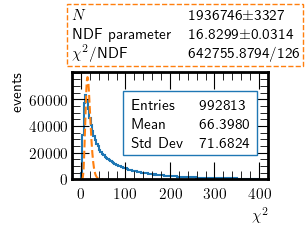

In [24]:
draw_chi2_gaussian_sim("kf_chi2", "f0", xlabel=r'$\chi^2$', x_max=50.,
                       ylabel='events',
                    fraction=0.47,
                    info_coords=(0.3, 0.3),
                    dh=0.8, dw=-0.3,
                    h_y=20000, h_x=100)
plt.savefig('kf_chi2_gsim_kskpi_bad2.eps', bbox_inches='tight')

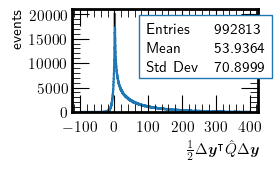

In [26]:
draw_1d_hist("qhist", 
             xlabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$',
            fraction=0.47,
             ylabel='events',
            info_coords=(0.4, 0.4),
            h_y=5000, h_x=100)
plt.gcf().subplots_adjust(bottom=0.285)
plt.gcf().subplots_adjust(left=0.235)
plt.savefig('qhalf_gsim_kskpi_bad2.eps')

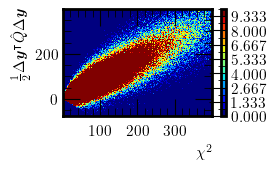

In [37]:
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(0, 10, 16)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
draw_2d_hist2('chi2_vs_q', 
              xlabel=r'$\chi^2$', 
              ylabel=r'$\frac{1}{2}\Delta\bm{y}^{\intercal}\hat{Q}\Delta\bm{y}$', 
              fraction=0.47,
              bins=(200, 200),
              norm=norm,
              clip=((0, 400.), (-400., 400.)))
plt.gcf().subplots_adjust(left=0.235)
plt.gcf().subplots_adjust(bottom=0.26)
plt.savefig('qhalf_vs_chi2_gsim_kskpi_bad2.eps')

In [22]:
# fl.Close()